In [1]:
import rebound
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from rebound.plotting import fading_line
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

In [3]:
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=1,a=5,primary=sim.particles[0])
sim.add(m=1e-3,a=0.5,e=0.05,primary=sim.particles[0],f=1)    
sim.add(m=1e-3,a=1.25,e=0.05,primary=sim.particles[0],f=2)    
sim.add(m=1e-3,a=0.5,e=0.05,primary=sim.particles[1],f=3)
sim.add(m=1e-3,a=1.25,e=0.05,primary=sim.particles[1],f=4)
sim.add(m=1e-3,a=10,e=0.05,f=6)
sim.add(m=1e-3,a=15,e=0.05,f=7)
sim.move_to_com()
sim.N_active = sim.N

for i in range(200):
    sim.add(m=0, a=np.random.uniform(0.4,2.5),f=np.random.uniform(0.,np.pi*2.),e=0.06*np.random.uniform(),inc=0.04*np.random.normal(),primary=sim.particles[0])
for i in range(200):
    sim.add(m=0, a=np.random.uniform(0.4,2.5),f=np.random.uniform(0.,np.pi*2.),e=0.06*np.random.uniform(),inc=0.04*np.random.normal(),primary=sim.particles[1])
for i in range(200):
    sim.add(m=0, a=np.random.uniform(7.5,17),f=np.random.uniform(0.,np.pi*2.),e=0.06*np.random.uniform(),inc=0.04*np.random.normal())

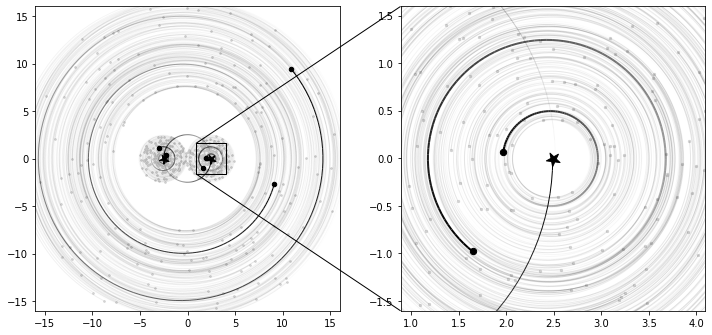

In [5]:
xyz = np.zeros((sim.N,3))
sim.serialize_particle_data(xyz=xyz)

fig, axs = plt.subplots(1,2,figsize=(12,6))
for ax in axs:
    ax.set_aspect("equal")
lim = 16
axs[0].set_xlim([-lim,lim])
axs[0].set_ylim([-lim,lim])
zoom = 10.
axs[1].set_xlim([-lim/zoom+sim.particles[1].x,lim/zoom+sim.particles[1].x])
axs[1].set_ylim([-lim/zoom+sim.particles[1].y,lim/zoom+sim.particles[1].y])



p1 = sim.particles[1].copy()
p1.m = 0.
p0 = sim.particles[0].copy()
p0.m = 0.
comt = sim.calculate_com()
com = sim.calculate_com()
com.m = 0.25


t = mpl.markers.MarkerStyle(marker="*")
t._transform = t.get_transform().rotate_deg(29)

axs[0].scatter(xyz[8:,0],xyz[8:,1],marker=".",color="lightgray",s=10)    
axs[1].scatter(xyz[8:,0],xyz[8:,1],marker=".",color="lightgray",s=20)    

for ax in axs:
    pts = np.array(p1.sample_orbit(Npts=128, primary=com))
    lc = fading_line(pts[:,0],pts[:,1],alpha_final=-1.,alpha_initial=1)
    ax.add_collection(lc)
    pts = np.array(p0.sample_orbit(Npts=128, primary=com))
    lc = fading_line(pts[:,0],pts[:,1],alpha_final=-1.,alpha_initial=1)
    ax.add_collection(lc)

for i in range(2):
    for ax in axs:
        pts = np.array(sim.particles[2+i].sample_orbit(Npts=128, primary=sim.particles[0]))
        lc = fading_line(pts[:,0],pts[:,1],"black",alpha_final=0.)
        ax.add_collection(lc)

        pts = np.array(sim.particles[6+i].sample_orbit(Npts=128, primary=sim.calculate_com()))
        lc = fading_line(pts[:,0],pts[:,1],"black",alpha_final=0.)
        ax.add_collection(lc)
        
    pts = np.array(sim.particles[4+i].sample_orbit(Npts=128, primary=sim.particles[1]))
    lc = fading_line(pts[:,0],pts[:,1],"black",alpha_final=0.)
    axs[0].add_collection(lc)
    
    pts = np.array(sim.particles[4+i].sample_orbit(Npts=128, primary=sim.particles[1]))
    lc = fading_line(pts[:,0],pts[:,1],"black",alpha_final=0.,lw=2)
    axs[1].add_collection(lc)

for i in range(200):     
    pts = np.array(sim.particles[8+200+i].sample_orbit(Npts=128, primary=sim.particles[1]))
    lc = fading_line(pts[:,0],pts[:,1],"black",alpha_final=0.,alpha_initial=0.1)
    axs[1].add_collection(lc)            
    pts = np.array(sim.particles[8+200+i].sample_orbit(Npts=128, primary=sim.particles[1]))
    lc = fading_line(pts[:,0],pts[:,1],"black",alpha_final=0.,alpha_initial=0.02)
    axs[0].add_collection(lc)            
    pts = np.array(sim.particles[8+i].sample_orbit(Npts=128, primary=sim.particles[0]))
    lc = fading_line(pts[:,0],pts[:,1],"black",alpha_final=0.,alpha_initial=0.02)
    axs[0].add_collection(lc)            
    pts = np.array(sim.particles[8+400+i].sample_orbit(Npts=128, primary=comt))
    lc = fading_line(pts[:,0],pts[:,1],"black",alpha_final=0.,alpha_initial=0.06)
    axs[0].add_collection(lc)            



        
axs[0].scatter(xyz[0:2,0],xyz[0:2,1],marker=t,color="black",s=100)
axs[0].scatter(xyz[2:8,0],xyz[2:8,1],marker="o",color="black",s=20)

axs[1].scatter(xyz[0:2,0],xyz[0:2,1],marker=t,color="black",s=210)
axs[1].scatter(xyz[2:8,0],xyz[2:8,1],marker="o",color="black",s=40)


mark_inset(axs[0], axs[1], loc1=2, loc2=3, fc="none", ec="0");

plt.savefig("figurebinaryinitial.pdf", bbox_inches = 'tight', pad_inches = 0)
os.system("cp figurebinaryinitial.pdf ~/papers/mercurana/");